# Comparing Euphonic and an Updated OClimax

In [7]:
# Ignore errors resulting from matplotlib's fig.show(). This causes
# a warning when run from a notebook, but is still required if the
# scripts are run from the CL
import warnings
warnings.simplefilter("ignore", UserWarning)

This notebook follows on from the previous notebook, `validate_oclimax_old`.

From a review of that notebook and discussions with the OClimax developer, it has been determined that the discrepancies exist for 2 main reasons:

* **Use of bin sizes that do not divide into 1**. OClimax will use equivalent q-points from other Brillouin zones to fill in q-bins, if a bin size is used that doesn't divide exactly into 1 there may be other q-points in other zones that fall within the bin, causing 2 or more q-points to contribute for OClimax, whereas for Euphonic only the exactly intended q-point will contribute. e.g. For the 30L_qe cut if a bin size of 0.075 is used, for q-point [-3., 0., 0.] the q-point [-3., 0., 0.] will contribute, but so will equivalent q-points [-3., 0., 0.975] and [-3., 0., 2.025] which also fall within the bin.
* **Numerical binning issues**. For example, when using a bin size of 0.025, Euphonic treats this as 0.025, whereas OClimax treated this as 0.0249999999. This results in adjacent q-points being included in the bin.

The cuts used previously have been updated to use a bin size that divides into 1, and OClimax has been updated to fix the numerical binning differences. Now that these issues have been fixed, the analysis will be repeated with the updated cuts and updated version of OClimax.

### By eye comparison

By just looking at the S(Q,w) plots for both OClimax (left) and Euphonic (left) you can tell the comparison is now much better. This will be quantified in the numerical comparisons to follow.

Quartz 2ph_m4_0


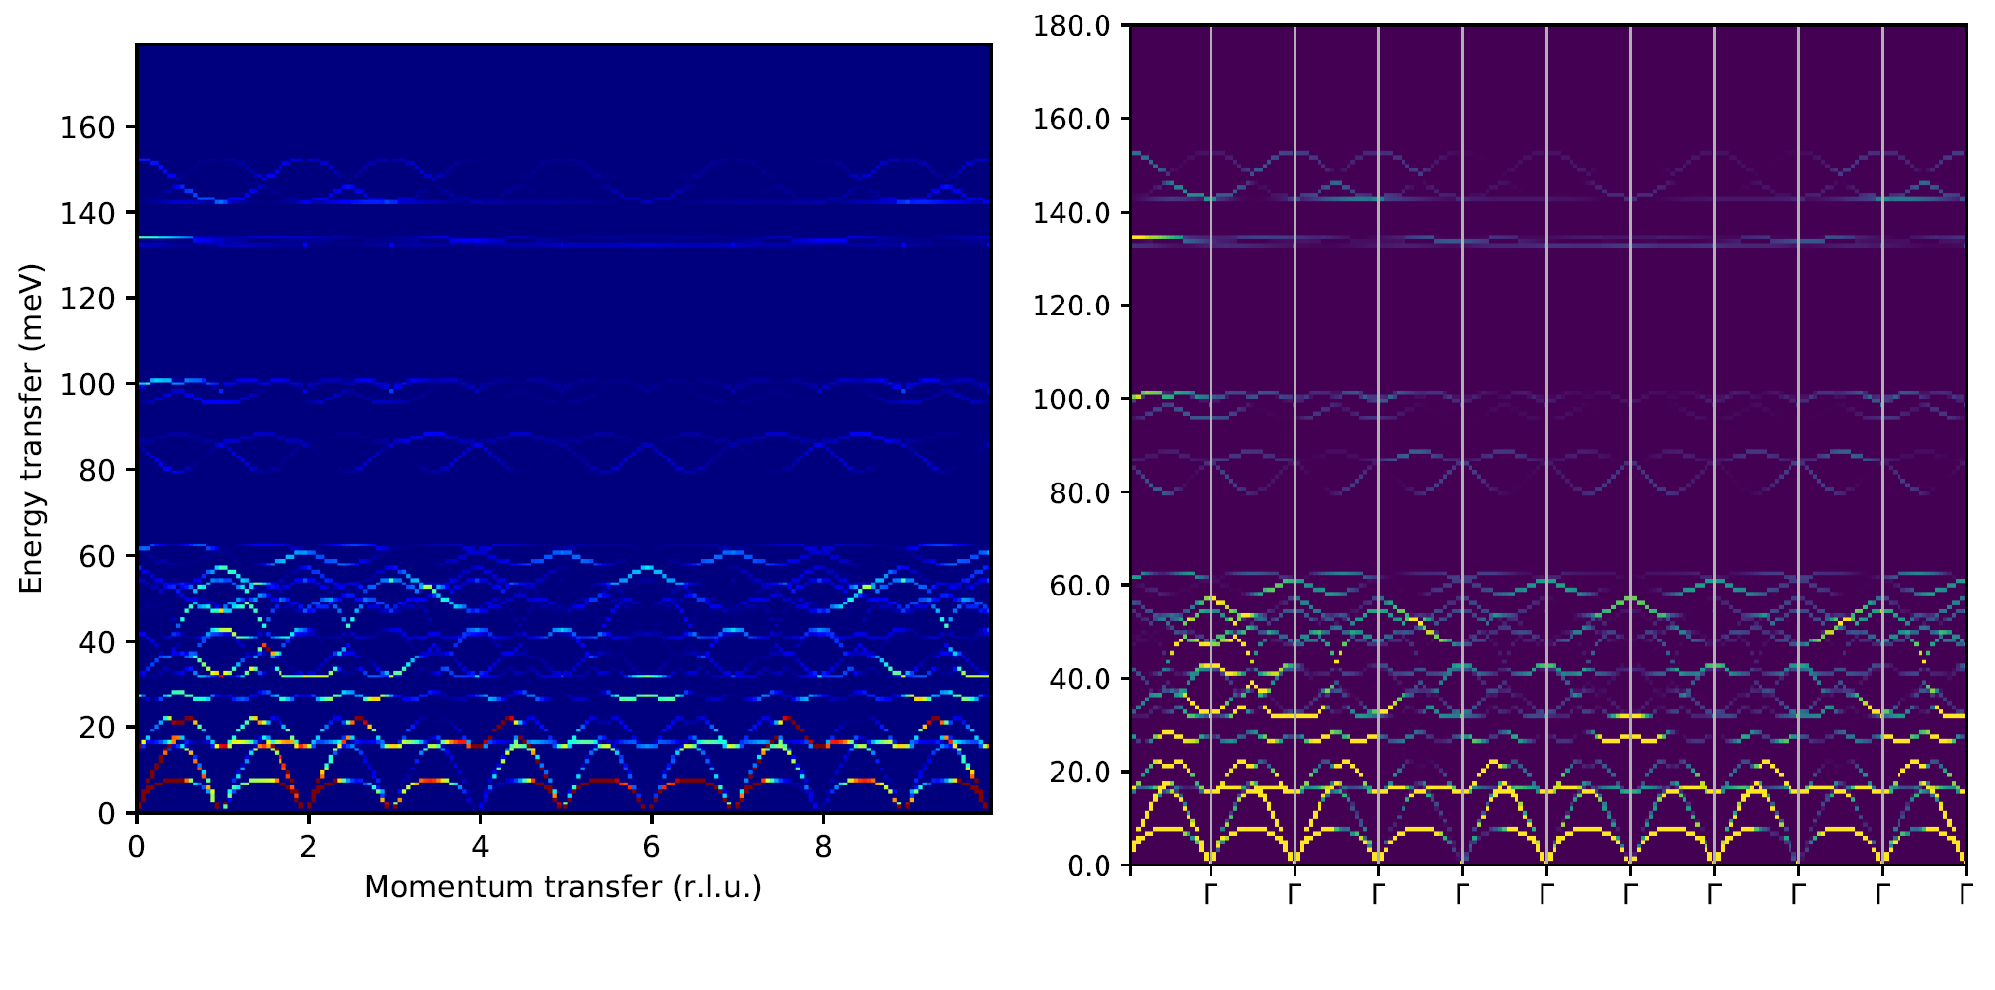

In [8]:
from IPython.display import Image
print('Quartz 2ph_m4_0')
Image(filename='images/quartz_2ph_m4_0.png')

Quartz 30L with 0.025 size bins


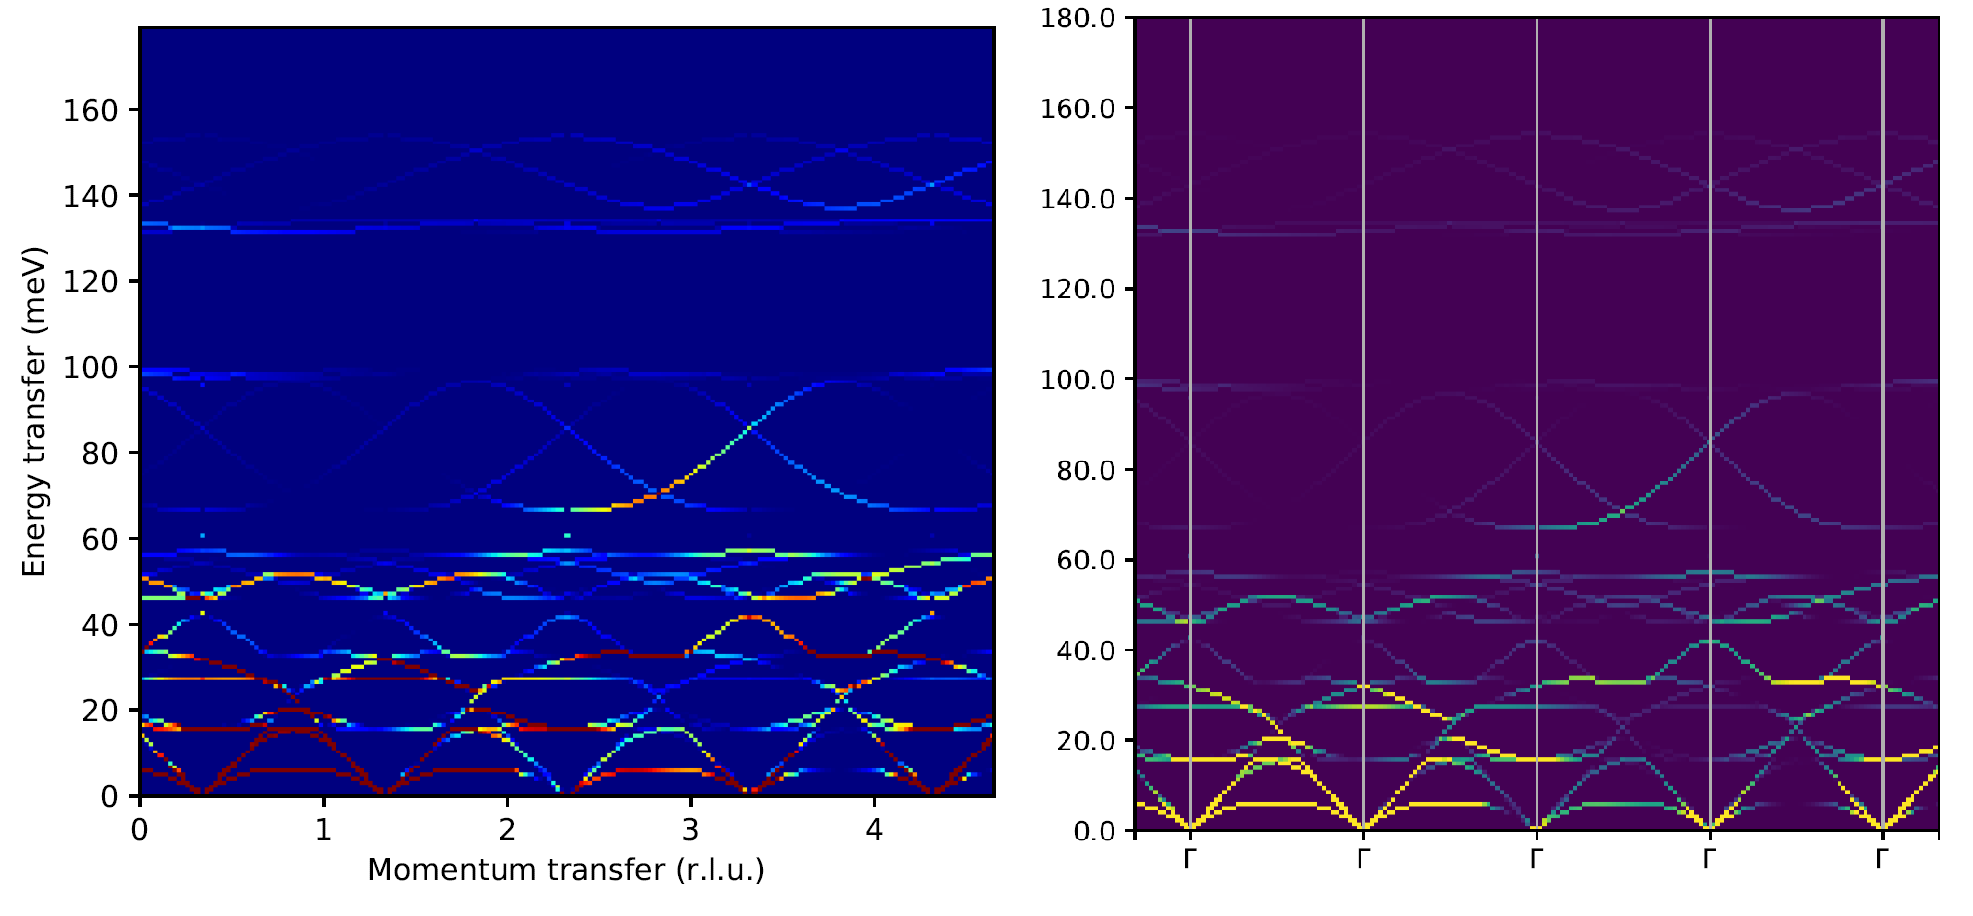

In [9]:
print('Quartz 30L with 0.025 size bins')
Image(filename='images/quartz_30L_fine.png')

LZO kagome


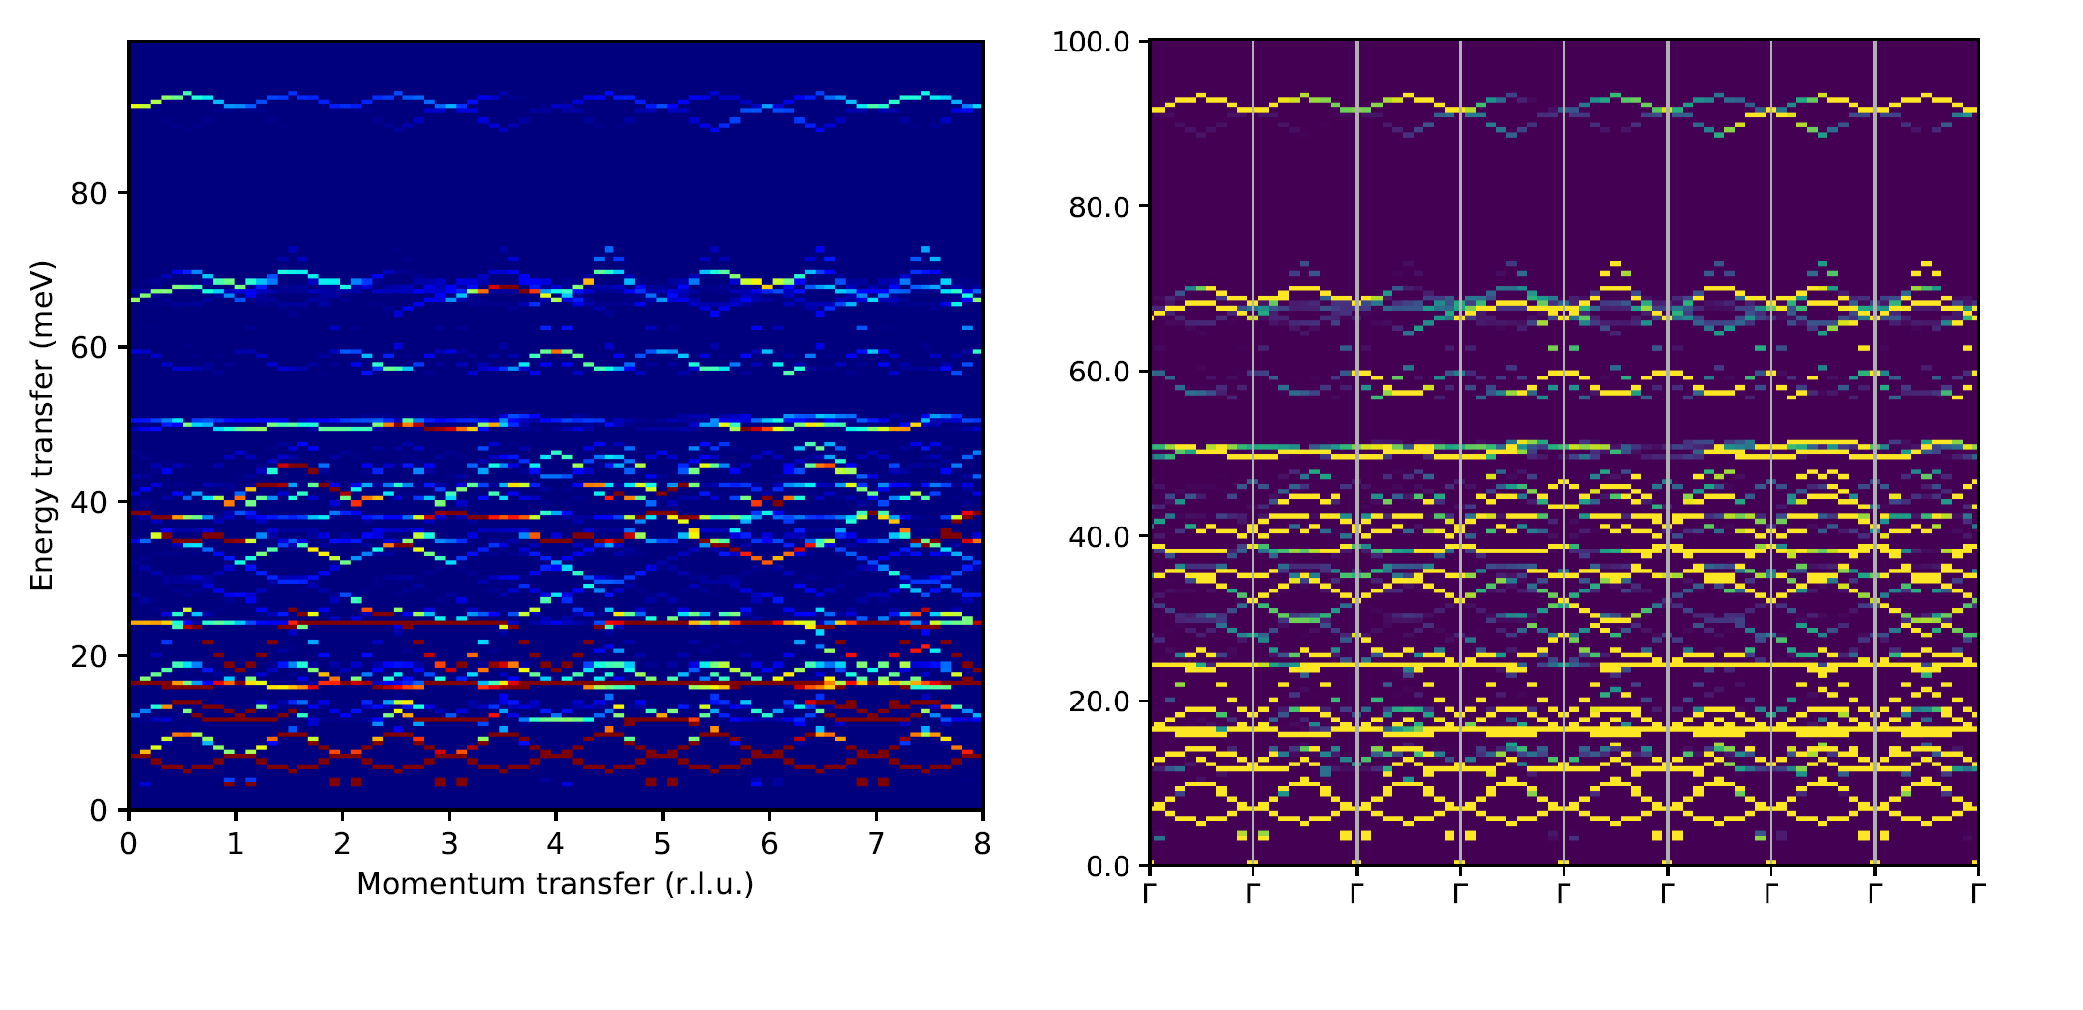

In [10]:
print('LZO kagome')
Image(filename='images/lzo_kagome.png')

LZO hh2 with 0.025 size bins


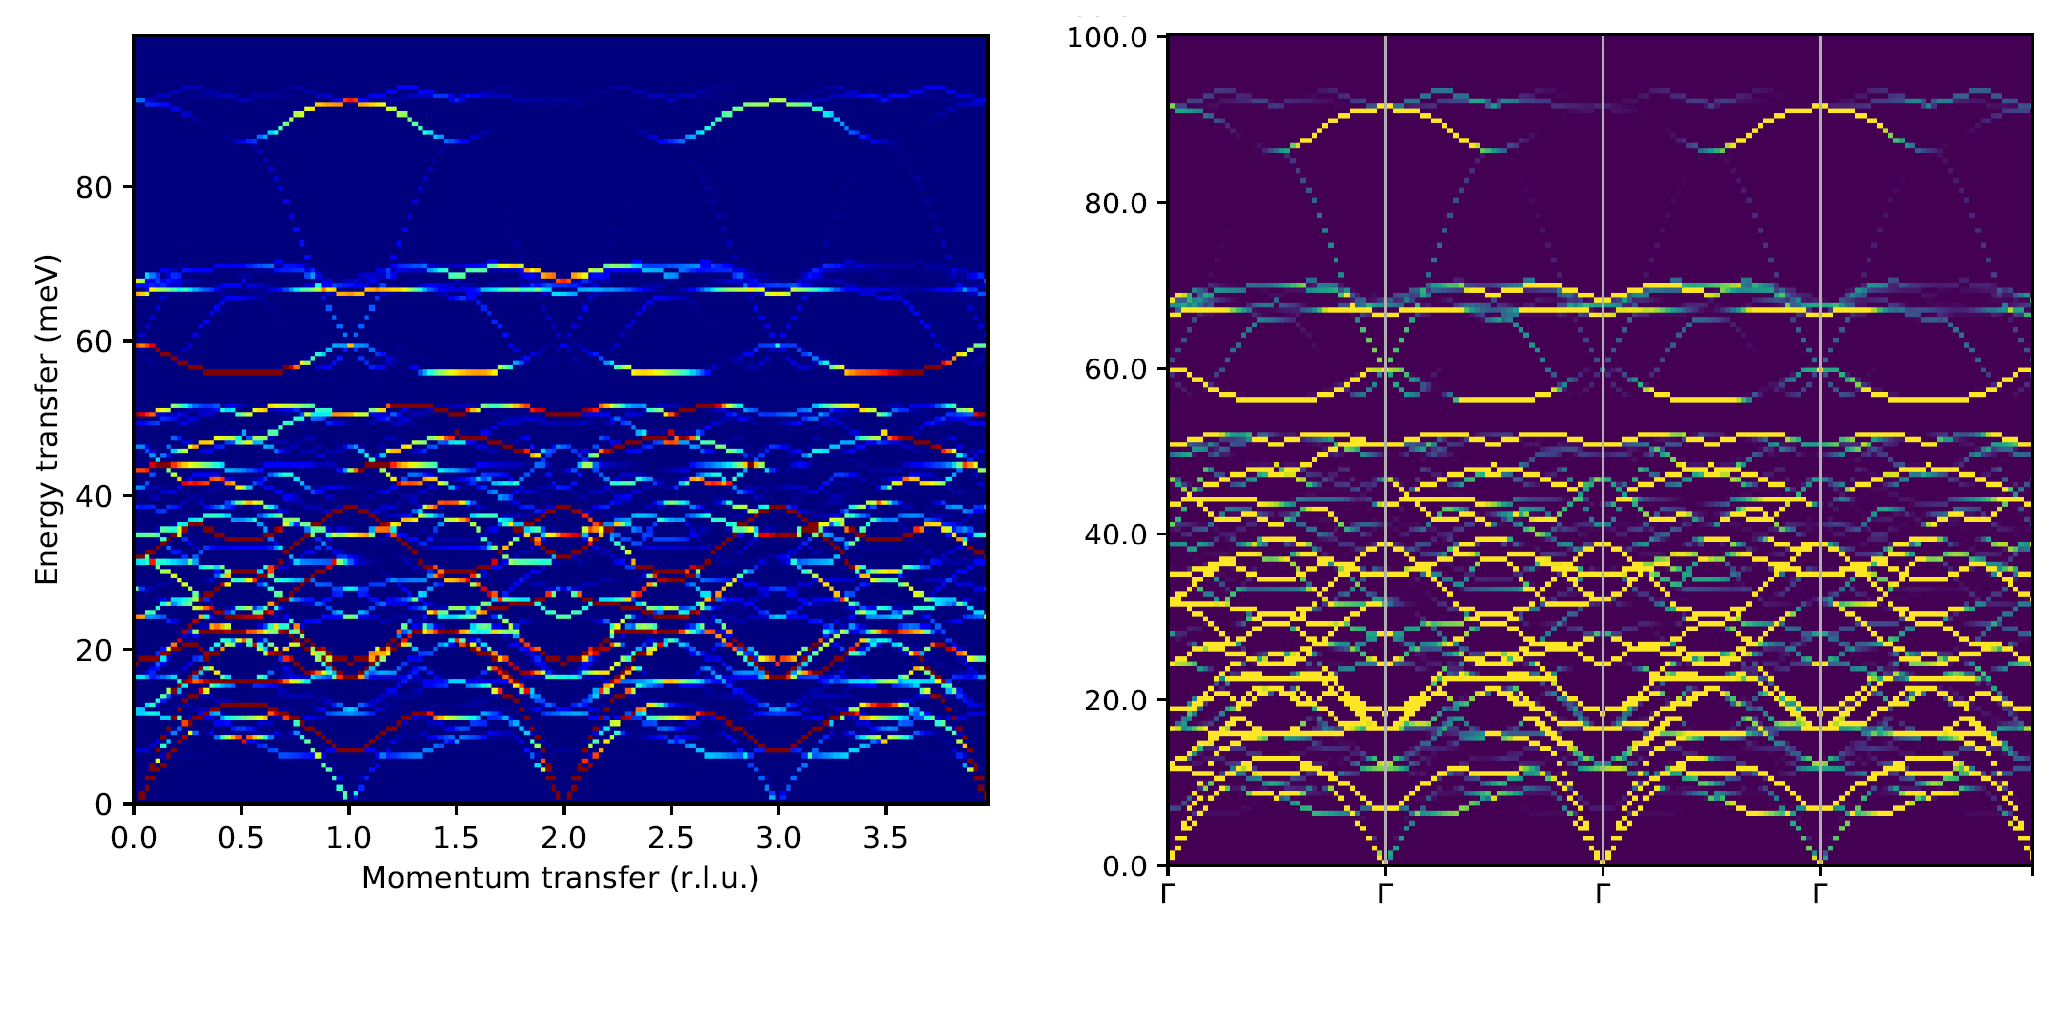

In [11]:
print('LZO hh2 with 0.025 size bins')
Image(filename='images/lzo_hh2_fine.png')

Nb m110


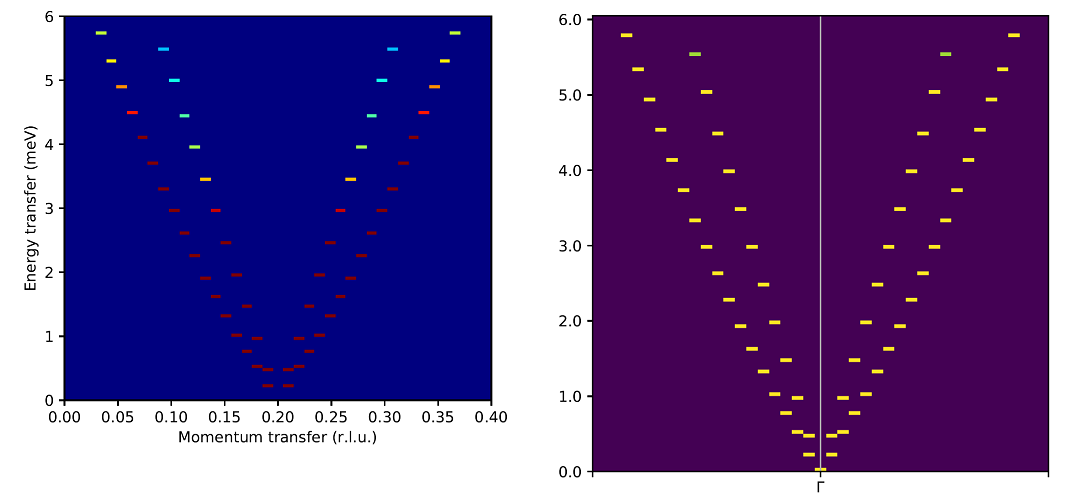

In [12]:
print('Nb m110')
Image(filename='images/nb_m110.png')

Nb 110


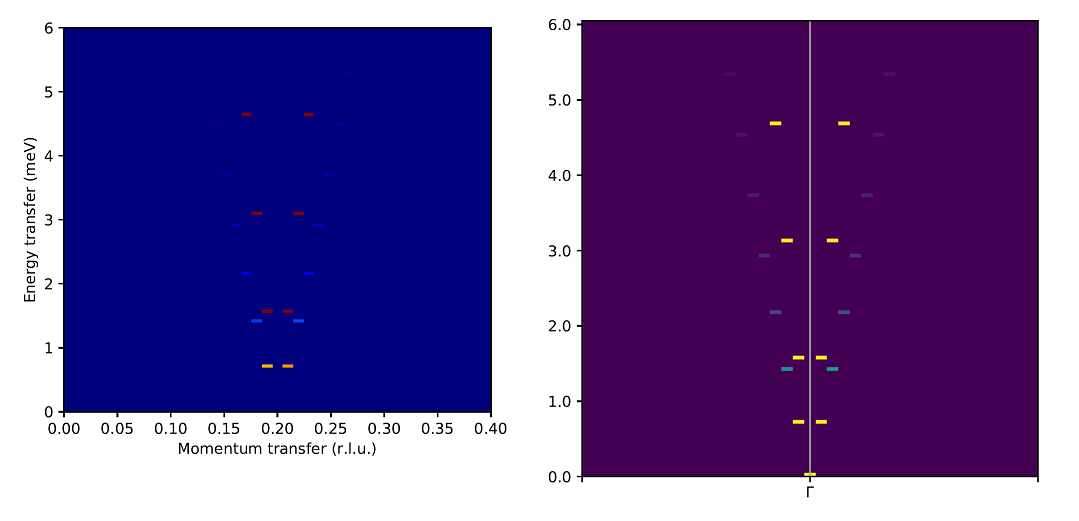

In [13]:
print('Nb 110')
Image(filename='images/nb_110.png')

### Comparing with eigenvalues/vectors read from .phonon

Lets start with comparing the OClimax S(Q,w) with Euphonic's S(Q,w) that has been calculated with frequencies/eigenvectors read from a `.phonon` file:

In [14]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main


quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sqw_main(['--sqw1', '../../quartz/' + cut + '/oclimax/sqw_euphonic_ph_5K.json',
                      '--sqw2', '../../quartz/' + cut + '/oclimax/quartz_2Dmesh_scqw_5K.csv',
                      '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_ph_300K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                      '--mask-bragg'])

nb_cuts = ['m110_qe', '110_qe']
for cut in nb_cuts:
    compare_sqw_main(['--sqw1', '../../nb/' + cut + '/oclimax/sqw_euphonic_ph_100K.json',
                      '--sqw2', '../../nb/' + cut + '/oclimax/nb_2Dmesh_scqw_100K.csv',
                      '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 2.2191913347153788e-12 max: 2.5626428272327435e-10 min: 4.782928536955211e-18
Relative Error - mean: 0.007314831282535368 max: 0.11716470965313545 min: 3.502307097247213e-06

Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.5164485754913033e-12 max: 1.848116062528396e-10 min: 1.09720504090006e-17
Relative Error - mean: 0.010964458623400791 max: 0.5329117292926163 min: 8.481313067040283e-07

Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 2.6831231891936023e-11 max: 1.4082788747245597e-09 min: 1.515865377609533e-15
Relative Error - mean: 0.04628705216246576 max: 2.1408861302337616 min: 4.522919522305766e-06

Results for ../../lzo/hh2_qe_f

Previously, the smallest mean relative error for all the cuts was 30%, now it has been reduced to just 0.7% and 1.1% for the Quartz cuts, and 4.6% and 5.4% for the LZO cuts, so clearly the corrections described above have improved the comparison. The mean relative errors for the Nb cuts are also just 3e-4% and 2e-3%.

Generally, the errors for LZO are still slightly high, could this be due to temperature differences? 5K for Quartz and 300K for LZO were chosen as these are the experimental temperatures. For a fairer comparison, what if 5K is used for the LZO cuts?

In [15]:
lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_ph_5K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv',
                      '-n', '5', '--mask-bragg'])


Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_5K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.1681117406239812e-11 max: 7.19566781831633e-10 min: 3.7788341412906947e-16
Relative Error - mean: 0.023936792969593317 max: 0.9255972349446654 min: 5.7662318491949656e-06
Points with largest mean relative error: (array([66,  9, 65, 41, 64], dtype=int64), array([112, 113, 112,   5, 112], dtype=int64))

Results for ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv
Absolute Error - mean: 6.960077860842671e-12 max: 4.189990495697056e-10 min: 9.429818758553688e-18
Relative Error - mean: 0.027229628507068712 max: 7.354067932770651 min: 2.613315797470573e-07
Points with largest mean relative error: (array([ 39,  41,  10,   0, 121], dtype=int64), array([  2,   2, 116,  67,   2], dtype=int64))


This has reduced the errors for the LZO cuts to 2.4% and 2.7%, so the temperature does make a difference - there may be some slight differences in the Bose factor and Debye-Waller factor. But even with almost no temperature effects the errors are still  2.4% and 2.7%. Lets look at the `hh2_qe_fine` cut and look at the q-points with the largest errors:


Results for ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv
Absolute Error - mean: 6.960077860842671e-12 max: 4.189990495697056e-10 min: 9.429818758553688e-18
Relative Error - mean: 0.027229628507068712 max: 7.354067932770651 min: 2.613315797470573e-07


<IPython.core.display.Javascript object>


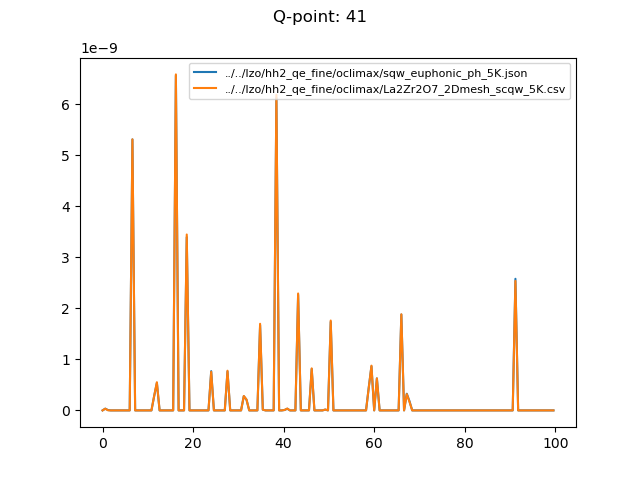

<IPython.core.display.Javascript object>


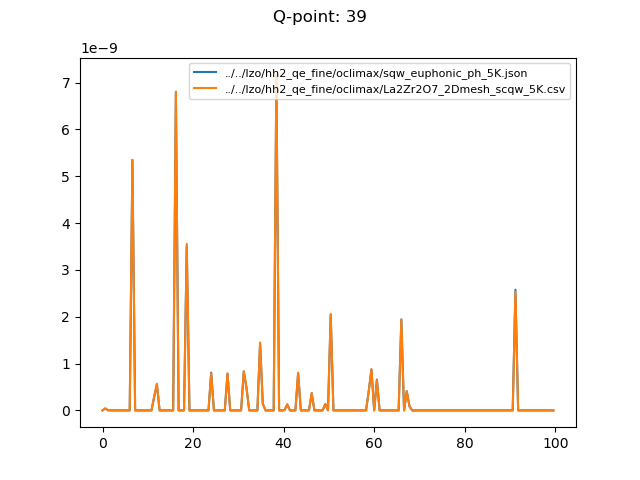

Points with largest mean relative error: (array([ 39,  41,  10,   0, 121], dtype=int64), array([  2,   2, 116,  67,   2], dtype=int64))


In [25]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv', '-n', '5', '--qpts', '41,39', '--mask-bragg'])

Lets do the same with the `kagome_qe` cut:


Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_5K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.1681117406239812e-11 max: 7.19566781831633e-10 min: 3.7788341412906947e-16
Relative Error - mean: 0.023936792969593317 max: 0.9255972349446654 min: 5.7662318491949656e-06


<IPython.core.display.Javascript object>


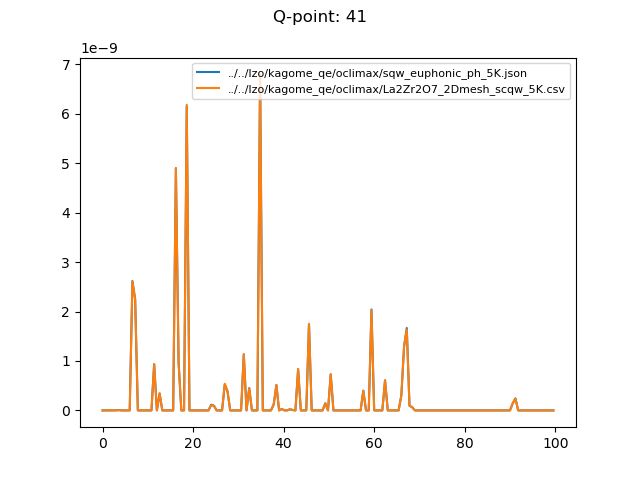

<IPython.core.display.Javascript object>


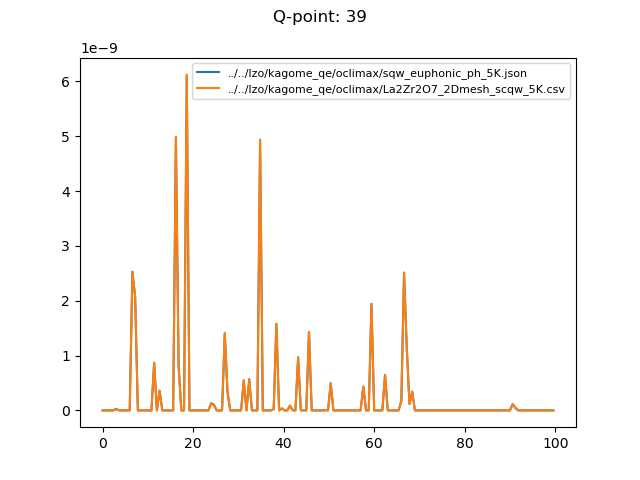

Points with largest mean relative error: (array([66,  9, 65, 41, 64], dtype=int64), array([112, 113, 112,   5, 112], dtype=int64))


In [17]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/kagome_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_5K.csv', '-n', '5', '--qpts', '41,39', '--mask-bragg'])

Even at the q-points with the largest mean relative error, the agreement is actually very good and perhaps just an artefact of differently ordered floating point calculations.

To be sure, lets look at those same q-points at a higher temperature (300K):


Results for ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_300K.json ../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.7883021179916917e-11 max: 5.988531955852151e-09 min: 1.5341301728527735e-16
Relative Error - mean: 0.054065351431804756 max: 3.8671583266885143 min: 4.831294834296395e-06


<IPython.core.display.Javascript object>


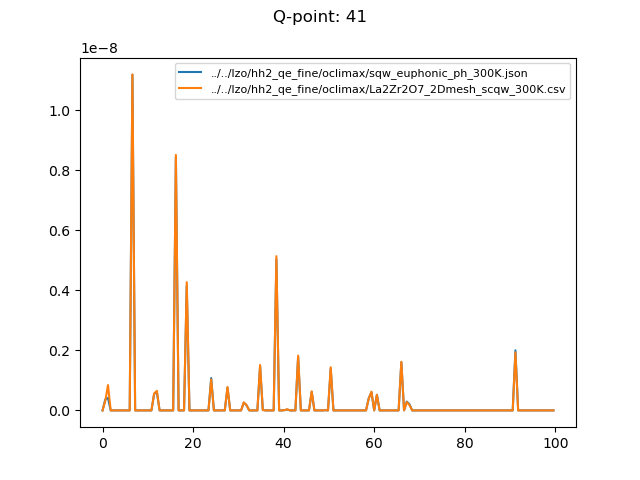

<IPython.core.display.Javascript object>


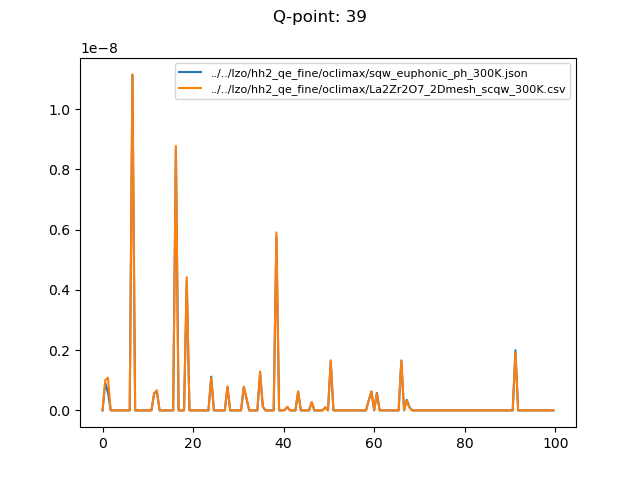

Points with largest mean relative error: (array([46, 17, 71, 12, 13], dtype=int64), array([ 16,  60, 149, 116,  52], dtype=int64))


In [18]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv', '-n', '5', '--qpts', '41,39', '--mask-bragg'])

There appears to be some large discrepancies in the low-energy modes, however if we look at the comparison between the structure factor calculations for Euphonic for frequencies read from a .phonon file and Euphonic-interpolated frequencies, there are similar differences at these low-energy modes:


Results for ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_300K.json ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_300K.json
Absolute Error - mean: 1.443405437766998e-11 max: 2.256631851444282e-08 min: 1.7841541851567013e-17
Relative Error - mean: 0.022113430529979855 max: 4.9967548272731594 min: 7.149772889680453e-07


<IPython.core.display.Javascript object>


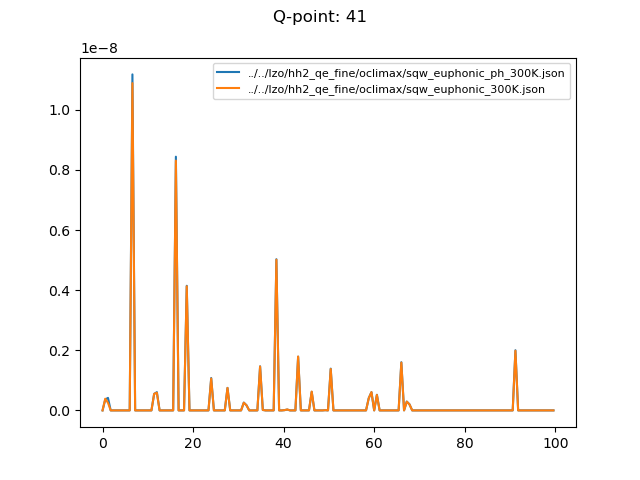

<IPython.core.display.Javascript object>


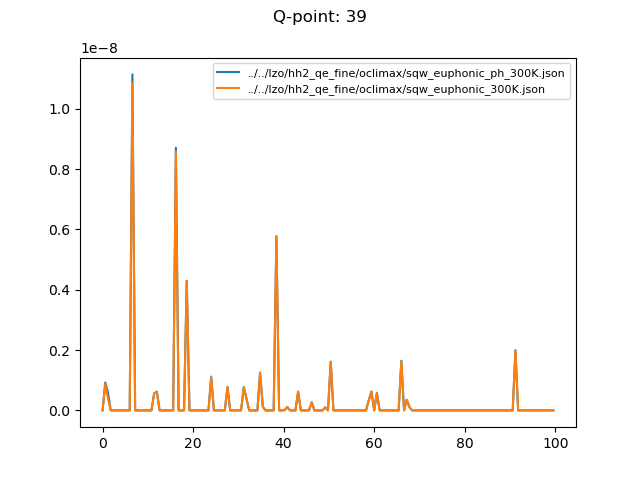

Points with largest mean relative error: (array([ 37,  44, 117,  15,  56], dtype=int64), array([ 8, 12,  8, 15, 15], dtype=int64))


In [19]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_ph_300K.json',
                  '--sqw2', '../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_300K.json', '-n', '5', '--qpts', '41,39', '--mask-bragg'])

This difference arises even though exactly the same formulation for the structure factor is being used, this shows just how sensitive the final structure factor is, and particularly how small floating point differences in the low temperature values (5K) are exaggerated by the population factor for low-energy modes at high temperatures. This is acceptable, and is not enough of to make any meaningful difference in application of the software.

Again, as a sanity check lets check some random q-points for both Quartz and Nb:


Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.5164485754913033e-12 max: 1.848116062528396e-10 min: 1.09720504090006e-17
Relative Error - mean: 0.010964458623400791 max: 0.5329117292926163 min: 8.481313067040283e-07


<IPython.core.display.Javascript object>


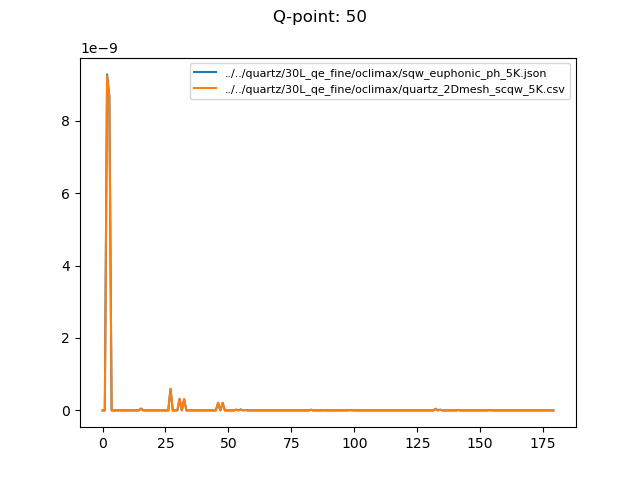

<IPython.core.display.Javascript object>


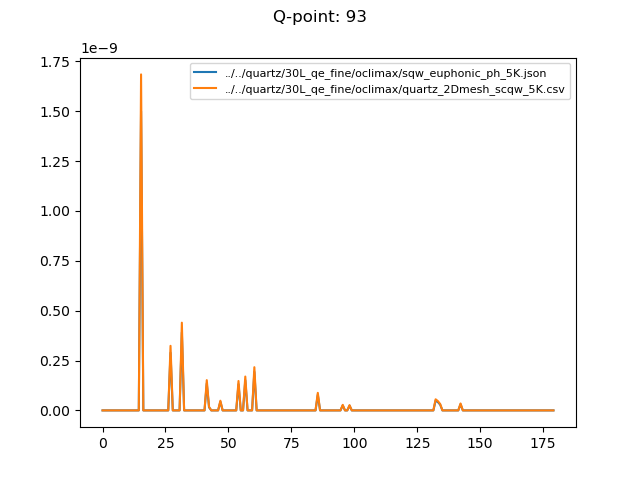


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 2.2191913347153788e-12 max: 2.5626428272327435e-10 min: 4.782928536955211e-18
Relative Error - mean: 0.007314831282535368 max: 0.11716470965313545 min: 3.502307097247213e-06


<IPython.core.display.Javascript object>


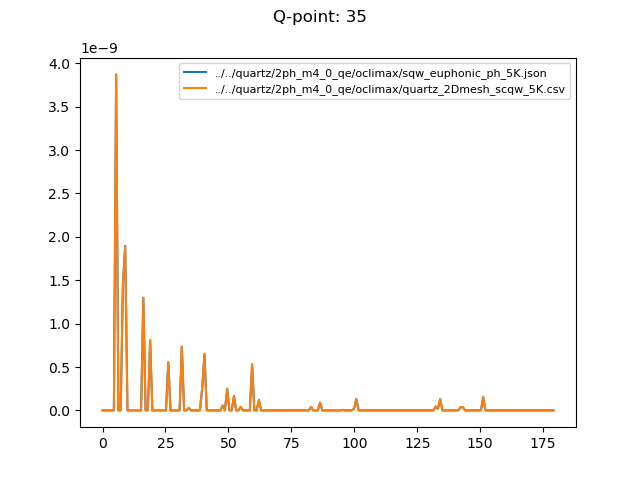

<IPython.core.display.Javascript object>


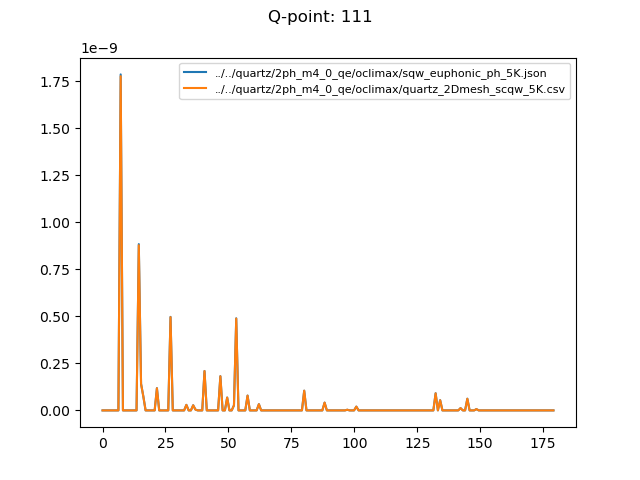


Results for ../../nb/m110_qe/oclimax/sqw_euphonic_ph_5K.json ../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_5K.csv
Absolute Error - mean: 7.56777276152165e-15 max: 1.66357761487888e-13 min: 8.891759977055696e-19
Relative Error - mean: 2.9187537471735553e-06 max: 5.616006148660901e-06 min: 9.140707501377147e-07


<IPython.core.display.Javascript object>


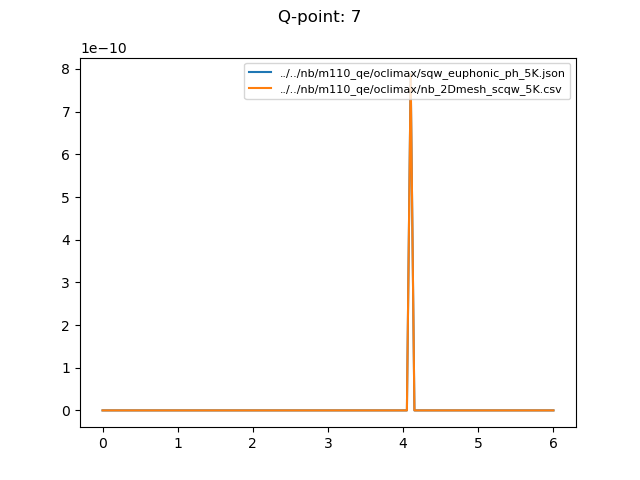

<IPython.core.display.Javascript object>


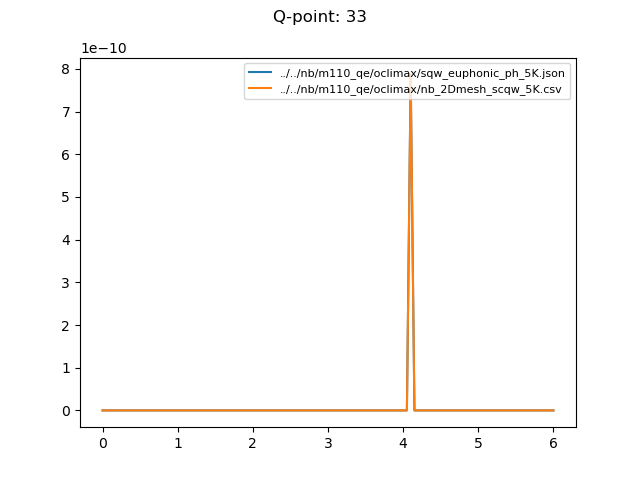


Results for ../../nb/110_qe/oclimax/sqw_euphonic_ph_5K.json ../../nb/110_qe/oclimax/nb_2Dmesh_scqw_5K.csv
Absolute Error - mean: 4.0289854852992655e-15 max: 2.3364165335639756e-14 min: 1.8183954005554754e-17
Relative Error - mean: 1.785817794382832e-05 max: 6.0927478948027906e-05 min: 1.2319477144197976e-07


<IPython.core.display.Javascript object>


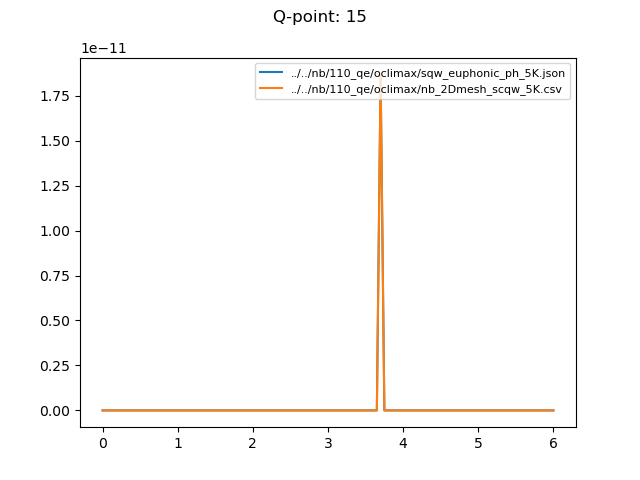

<IPython.core.display.Javascript object>


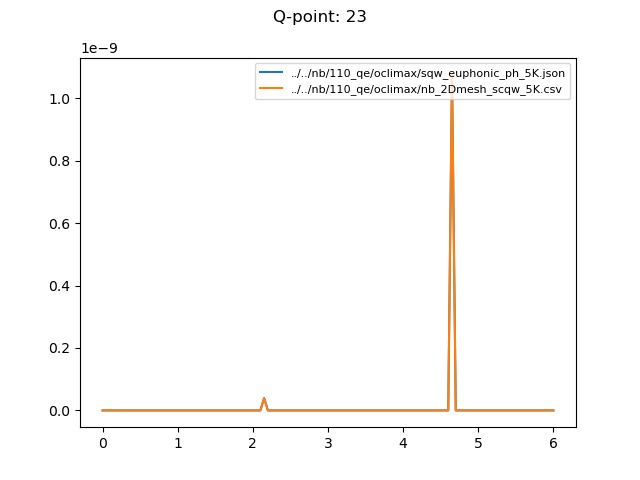

In [20]:
%matplotlib notebook
compare_sqw_main(['--sqw1', '../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '50,93', '--mask-bragg'])
compare_sqw_main(['--sqw1', '../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '35,111', '--mask-bragg'])

compare_sqw_main(['--sqw1', '../../nb/m110_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_5K.csv', '--qpts', '7,33', '--mask-bragg'])
compare_sqw_main(['--sqw1', '../../nb/110_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../nb/110_qe/oclimax/nb_2Dmesh_scqw_5K.csv', '--qpts', '15,23', '--mask-bragg'])

#### Comparing with eigenvalues/vectors interpolated from .castep_bin

The `sqw_euphonic_ph_5K.json` files contain Euphonic S(Q,w) calculated with frequencies read from a `.phonon` file, but to test Euphonic's interpolation we'll now read from `sqw_euphonic_5K.json` files which have been calculated with frequencies interpolated from a force constants matrix from a .castep_bin.

In [21]:
from compare_sf import main as compare_sf_main
from compare_sqw import main as compare_sqw_main


quartz_cuts = ['2ph_m4_0_qe', '30L_qe_fine']
for cut in quartz_cuts:
    compare_sqw_main(['--sqw1', '../../quartz/' + cut + '/oclimax/sqw_euphonic_5K.json',
                      '--sqw2', '../../quartz/' + cut + '/oclimax/quartz_2Dmesh_scqw_5K.csv',
                      '--mask-bragg'])

lzo_cuts = ['kagome_qe', 'hh2_qe_fine']
for cut in lzo_cuts:
    compare_sqw_main(['--sqw1', '../../lzo/' + cut + '/oclimax/sqw_euphonic_300K.json',
                      '--sqw2', '../../lzo/' + cut + '/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                      '--mask-bragg'])

nb_cuts = ['m110_qe', '110_qe']
for cut in nb_cuts:
    compare_sqw_main(['--sqw1', '../../nb/' + cut + '/oclimax/sqw_euphonic_100K.json',
                      '--sqw2', '../../nb/' + cut + '/oclimax/nb_2Dmesh_scqw_100K.csv',
                      '--mask-bragg'])


Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_5K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 2.279273937454071e-12 max: 2.5635761652460673e-10 min: 1.245015873857237e-17
Relative Error - mean: 0.007681564544548855 max: 0.13893285926652607 min: 2.0839181686608063e-07

Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_5K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 2.4213677286781326e-12 max: 2.2574508639896497e-10 min: 5.5085643067531065e-17
Relative Error - mean: 0.018464844902825902 max: 21.55311982686818 min: 1.1086928858391705e-05

Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 3.8319726682203e-11 max: 1.3530728906027624e-09 min: 1.8732604671133094e-15
Relative Error - mean: 0.0524473251530047 max: 2.4271138477185907 min: 3.01444186903582e-05

Results for ../../lzo/hh2_qe_fine/oclima

The results are similar to what has been shown for frequencies read from a .phonon file, only with slightly higher errors. As a sanity check, lets check some of the highest error q-points for each cut.


Results for ../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json ../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 1.5164485754913033e-12 max: 1.848116062528396e-10 min: 1.09720504090006e-17
Relative Error - mean: 0.010964458623400791 max: 0.5329117292926163 min: 8.481313067040283e-07


<IPython.core.display.Javascript object>


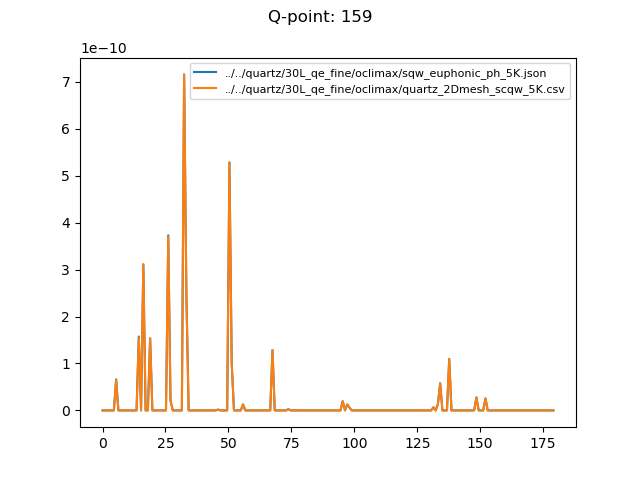

<IPython.core.display.Javascript object>


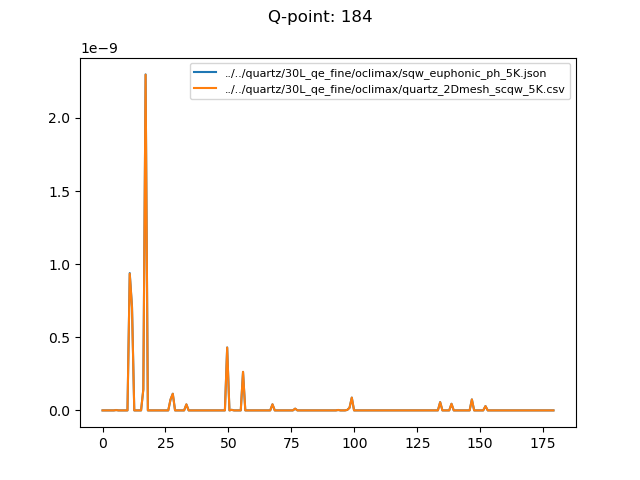

Points with largest mean relative error: (array([159, 184, 178, 153,  30], dtype=int64), array([14,  6, 36,  6, 21], dtype=int64))

Results for ../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_5K.json ../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv
Absolute Error - mean: 2.2191913347153788e-12 max: 2.5626428272327435e-10 min: 4.782928536955211e-18
Relative Error - mean: 0.007314831282535368 max: 0.11716470965313545 min: 3.502307097247213e-06


<IPython.core.display.Javascript object>


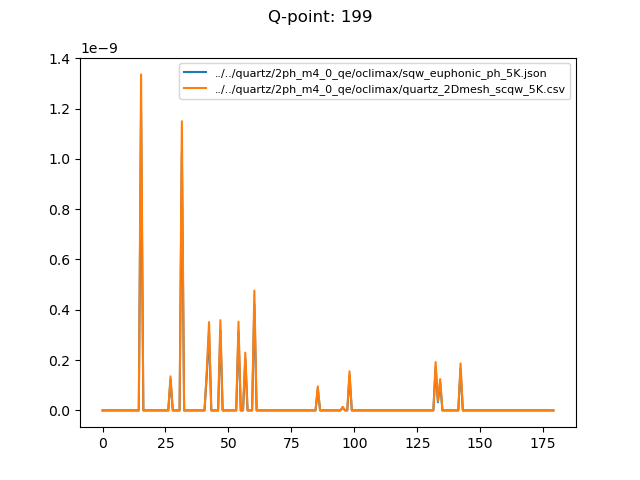

<IPython.core.display.Javascript object>


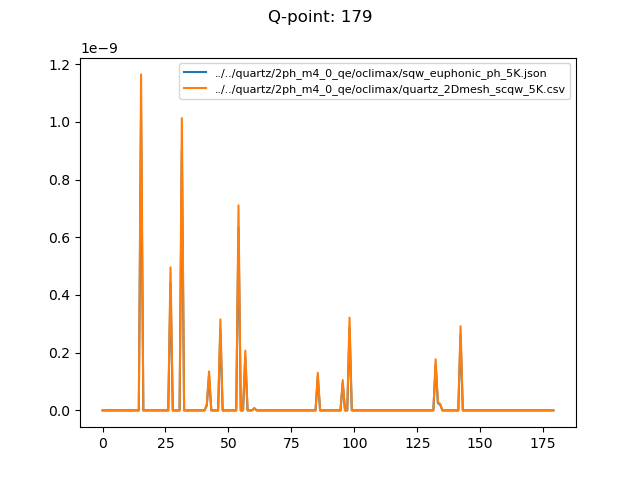

Points with largest mean relative error: (array([199, 179, 199,  59, 199], dtype=int64), array([106,  67,  63,  46,  47], dtype=int64))


In [22]:
compare_sqw_main(['--sqw1', '../../quartz/30L_qe_fine/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/30L_qe_fine/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '159,184', '--mask-bragg', '-n', '5'])
compare_sqw_main(['--sqw1', '../../quartz/2ph_m4_0_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../quartz/2ph_m4_0_qe/oclimax/quartz_2Dmesh_scqw_5K.csv', '--qpts', '199,179', '--mask-bragg', '-n', '5'])


Results for ../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json ../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 3.8319726682203e-11 max: 1.3530728906027624e-09 min: 1.8732604671133094e-15
Relative Error - mean: 0.0524473251530047 max: 2.4271138477185907 min: 3.01444186903582e-05


<IPython.core.display.Javascript object>


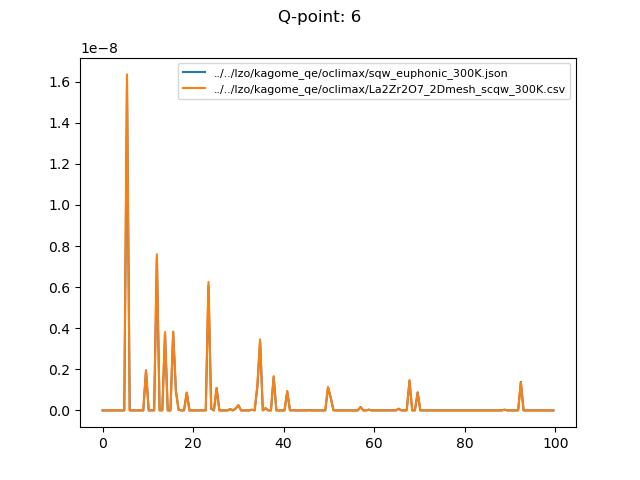

<IPython.core.display.Javascript object>


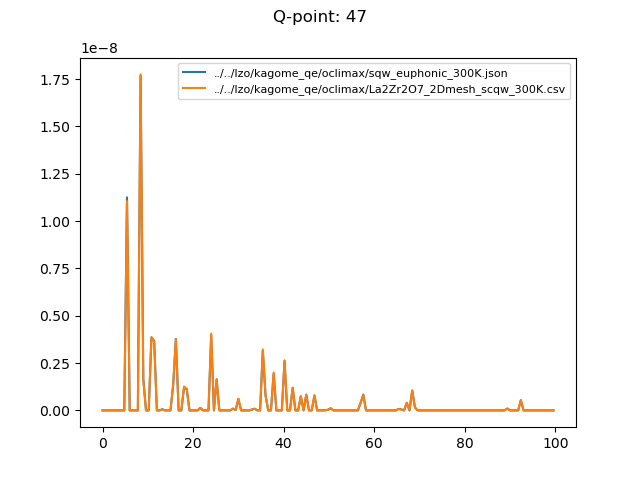


Results for ../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_300K.json ../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv
Absolute Error - mean: 1.9093775641895616e-11 max: 1.1998691205277658e-08 min: 2.420517669009301e-16
Relative Error - mean: 0.05997177498047691 max: 7.300282195610383 min: 9.446109038165633e-06


<IPython.core.display.Javascript object>


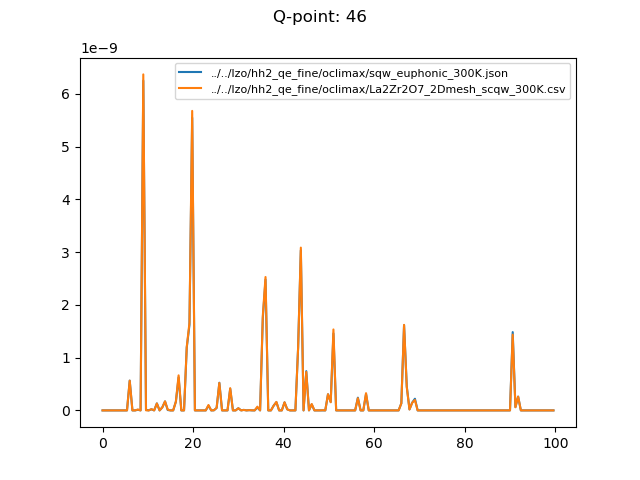

<IPython.core.display.Javascript object>


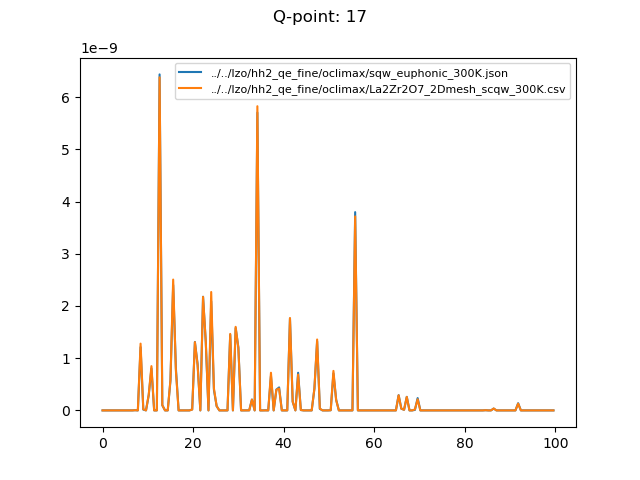

In [23]:
compare_sqw_main(['--sqw1', '../../lzo/kagome_qe/oclimax/sqw_euphonic_300K.json',
                  '--sqw2', '../../lzo/kagome_qe/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                  '--mask-bragg', '--qpts', '6,47'])
compare_sqw_main(['--sqw1', '../../lzo/hh2_qe_fine/oclimax/sqw_euphonic_300K.json',
                   '--sqw2', '../../lzo/hh2_qe_fine/oclimax/La2Zr2O7_2Dmesh_scqw_300K.csv',
                   '--mask-bragg','--qpts', '46,17'])


Results for ../../nb/m110_qe/oclimax/sqw_euphonic_ph_5K.json ../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_5K.csv
Absolute Error - mean: 7.56777276152165e-15 max: 1.66357761487888e-13 min: 8.891759977055696e-19
Relative Error - mean: 2.9187537471735553e-06 max: 5.616006148660901e-06 min: 9.140707501377147e-07


<IPython.core.display.Javascript object>


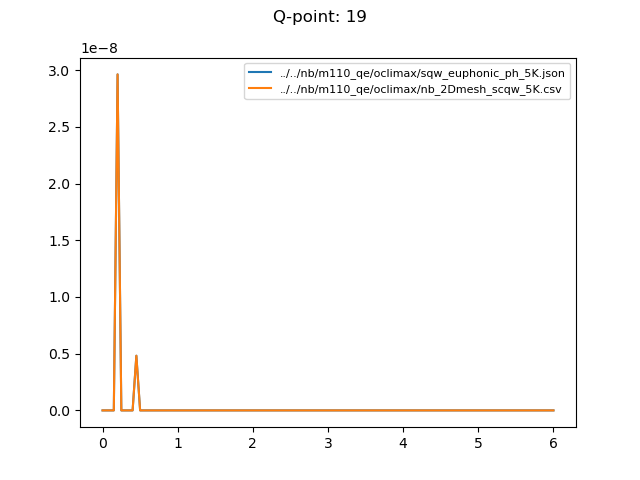

<IPython.core.display.Javascript object>


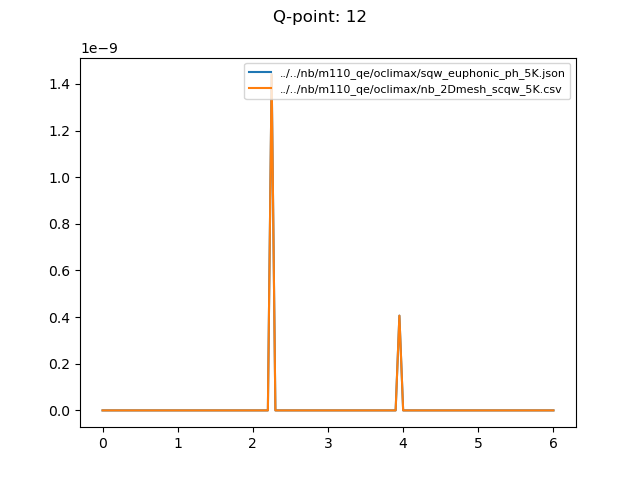


Results for ../../nb/110_qe/oclimax/sqw_euphonic_ph_5K.json ../../nb/110_qe/oclimax/nb_2Dmesh_scqw_5K.csv
Absolute Error - mean: 4.0289854852992655e-15 max: 2.3364165335639756e-14 min: 1.8183954005554754e-17
Relative Error - mean: 1.785817794382832e-05 max: 6.0927478948027906e-05 min: 1.2319477144197976e-07


<IPython.core.display.Javascript object>


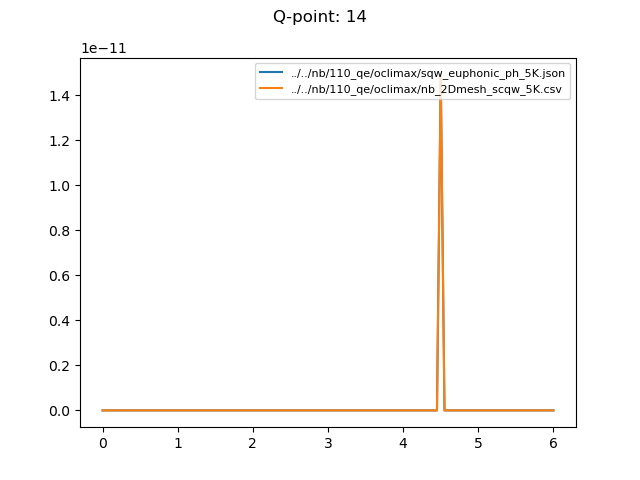

<IPython.core.display.Javascript object>


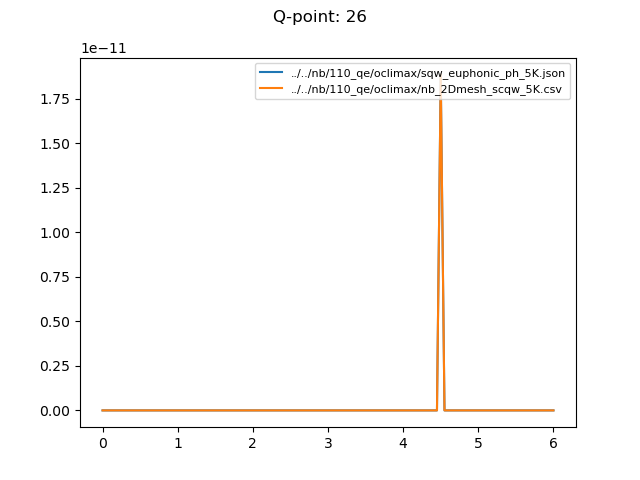

In [24]:
compare_sqw_main(['--sqw1', '../../nb/m110_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../nb/m110_qe/oclimax/nb_2Dmesh_scqw_5K.csv', '--qpts', '19,12', '--mask-bragg'])
compare_sqw_main(['--sqw1', '../../nb/110_qe/oclimax/sqw_euphonic_ph_5K.json',
                  '--sqw2', '../../nb/110_qe/oclimax/nb_2Dmesh_scqw_5K.csv', '--qpts', '14,26', '--mask-bragg'])

### Summary



The corrections made to the cuts and OClimax have resulted in very good agreement with Euphonic, particularly for Nb and LZO, with average errors of a few % or less. With LZO the errors have been higher, 4-5% at 300K and 2-3% at 5K. This is largely due to low energy modes and can likely be attributed to floating point differences in the population factor and would not realistically make any difference to the calculation.